In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np


In [2]:
file_path = '/gold.csv'
data = pd.read_csv(file_path)


In [11]:
print(data.columns)

Index(['Date', 'USD (AM)', 'USD (PM)', 'GBP (AM)', 'GBP (PM)', 'EURO (AM)',
       'EURO (PM)', 'Date_Ordinal'],
      dtype='object')


In [3]:
data['Date'] = pd.to_datetime(data['Date'])
data['Date_Ordinal'] = data['Date'].map(lambda x: x.toordinal())


In [4]:
X = data[['Date_Ordinal']]
y = data['USD (AM)']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [7]:
y_pred = model.predict(X_test)

In [8]:
mse = mean_squared_error(y_test, y_pred)


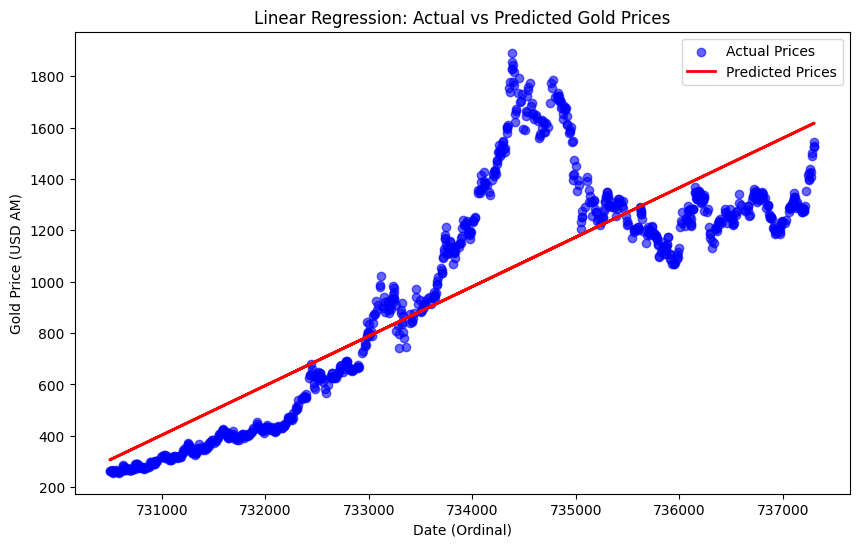

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Prices', alpha=0.6)
plt.plot(X_test, y_pred, color='red', label='Predicted Prices', linewidth=2)
plt.xlabel('Date (Ordinal)')
plt.ylabel('Gold Price (USD AM)')
plt.title('Linear Regression: Actual vs Predicted Gold Prices')
plt.legend()
plt.show()

In [20]:
print(y_pred[0])

640.7404016548535


In [10]:
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 59053.79315321787


In [18]:
user_date = input("Enter a future date in YYYY-MM-DD format: ")

try:

    future_date = pd.to_datetime(user_date)
    future_date_ordinal = pd.DataFrame([[future_date.toordinal()]], columns=['Date_Ordinal'])
    predicted_price = model.predict(future_date_ordinal)[0]
    print(f"The predicted gold price (USD AM) for {user_date} is: ${predicted_price:.2f}")
except Exception as e:
    print("Invalid date format. Please enter a valid date in YYYY-MM-DD format.")

Enter a future date in YYYY-MM-DD format: 3090-8-21
Invalid date format. Please enter a valid date in YYYY-MM-DD format.
